In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# create example data
X = np.random.rand(100, 1) * 2
y = 2 * X - 4*(X**3) + X**5
#y = 3*X**2
noise = np.random.normal(scale=0.15, size=y.shape)

y += noise

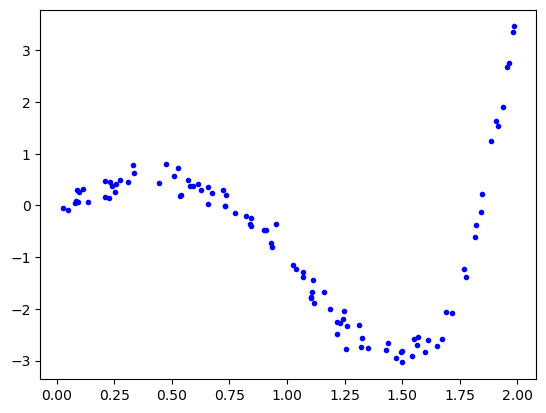

In [3]:
plt.plot(X, y, 'b.')
plt.show()

In [4]:
# Define the number of folds
k = 5

# Initialize an empty list to store the mean squared errors (MSEs) for each fold
mse_values = []

degrees = range(1, 11)

In [5]:
# Shuffle the data
n_samples = X.shape[0]
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

In [6]:
for degree in degrees:
    # Initialize an empty list to store the MSEs for this degree across all folds
    degree_mse_values = []

    # Loop through each fold
    fold_size = n_samples // k

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else n_samples

        test = range(start, end)
        train = list(set(range(n_samples)) - set(test))

        # Split the data into training and testing sets for this fold
        X_train, y_train = X[train], y[train]
        X_test, y_test = X[test], y[test]

        # Create polynomial features for X_train and X_test up to the current degree
        X_train_poly = np.concatenate([X_train**j for j in range(1, degree+1)], axis=1)
        X_test_poly = np.concatenate([X_test**j for j in range(1, degree+1)], axis=1)

        # Compute the coefficients for polynomial regression using the closed-form solution
        w = np.dot(np.linalg.inv(np.dot(X_train_poly.T, X_train_poly)), np.dot(X_train_poly.T, y_train))

        # Predict on the testing data
        y_pred = np.dot(X_test_poly, w)

        # Calculate the mean squared error for this fold and append to the list
        mse = np.mean((y_test - y_pred)**2)
        degree_mse_values.append(mse)

    # Calculate the mean MSE for this degree across all folds and append to the list
    mean_degree_mse = np.mean(degree_mse_values)
    mse_values.append(mean_degree_mse)

# Find the degree that yields the lowest average mean squared error across all folds
print(mse_values)
best_degree = degrees[np.argmin(mse_values)]
print(best_degree)

[2.1446716125825667, 1.8713512448030731, 0.2637381438793506, 0.02971525952917207, 0.028787354095904848, 0.029442361240185018, 0.02947362780021453, 0.030512410828239345, 0.031313541450272535, 0.030719356119117053]
5


In [7]:
# fit final polynomial regression model to entire dataset using best degree
X_d = np.ones((X.shape[0], 1))

for i in range(1, best_degree+1):
    X_d = np.hstack((X_d, X**i))
w = np.dot(np.linalg.inv(np.dot(X_d.T, X_d)), np.dot(X_d.T, y))


In [8]:
# generate input points for plotting
x_plot = np.linspace(np.min(X), np.max(X), 100)
x_plot_d = np.ones((x_plot.shape[0], 1))

for i in range(1, best_degree+1):
    x_plot_d = np.hstack((x_plot_d, x_plot.reshape(-1, 1)**i))


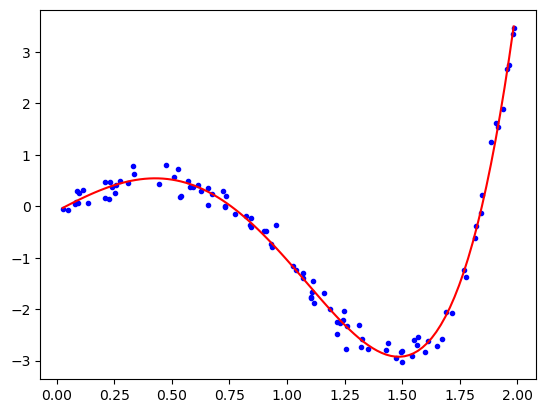

In [9]:
# compute predicted output values for the input points
y_plot = np.dot(x_plot_d, w)

# plot the input data and the line of regression
plt.plot(X, y, 'b.')
plt.plot(x_plot, y_plot, 'r-')
plt.show()